#Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

#Describtive Statics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Big data /code/PERTEMUAN 2/winequality-red.csv')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.shape

(1599, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#EDA

<Axes: >

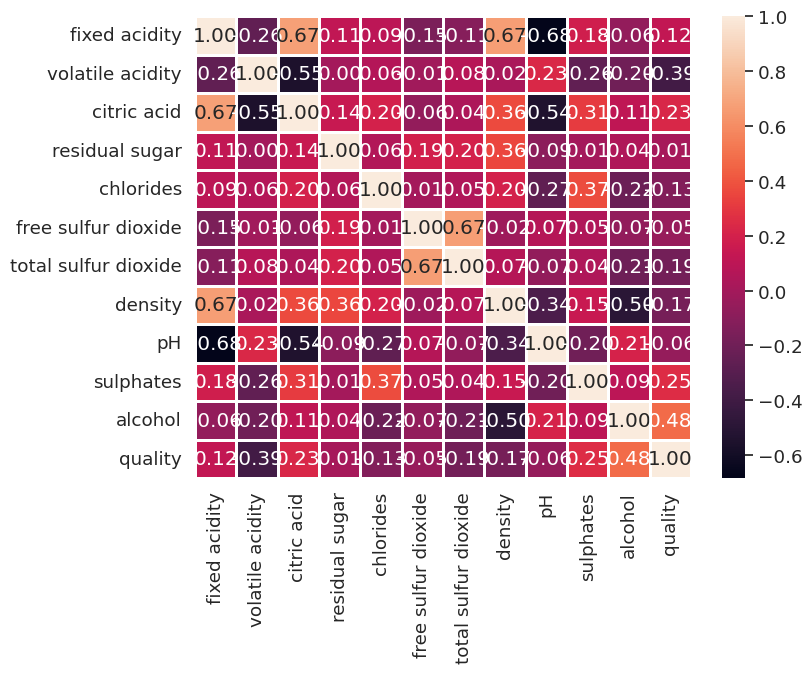

In [ ]:
#Korelasi antar fitur
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=2)

<Axes: >

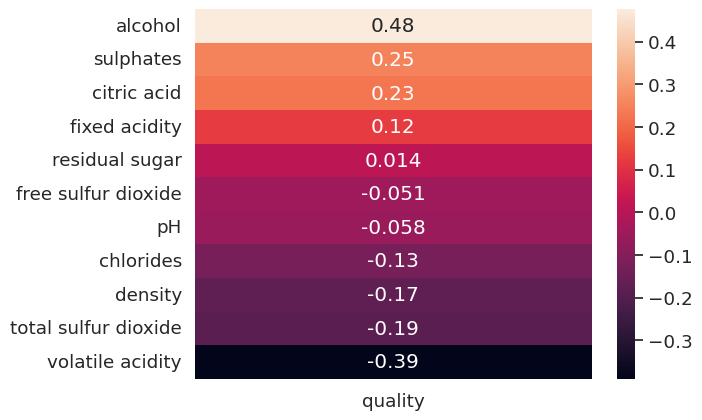

In [ ]:
#Pengaruh kolom 'Alcohol' pada kolom 'Quality'
corr = df.corr()
target_corr = corr["quality"].drop("quality")

target_corr_sorted = target_corr.sort_values(ascending=False)

sns.heatmap(target_corr_sorted.to_frame(), annot=True)

<Axes: xlabel='quality', ylabel='count'>

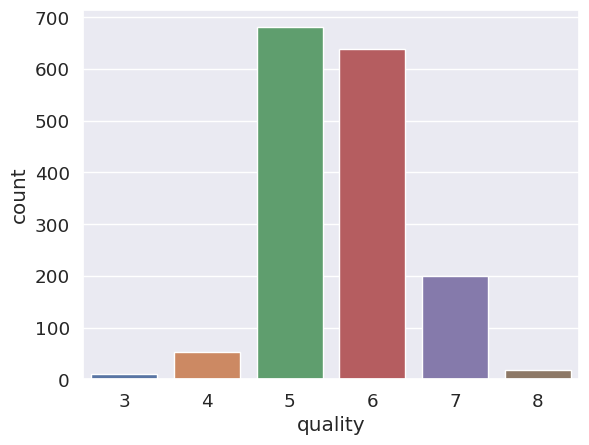

In [ ]:
#Hitung rata-rata dari kolom 'Quality'
sns.countplot(x='quality',data=df)

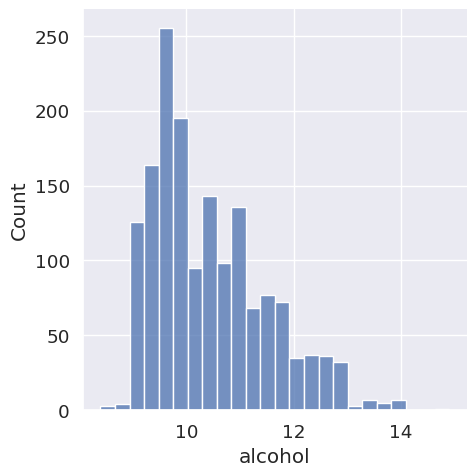

In [ ]:
#Hitung rata-rata dari kolom 'Alcohol'
sns.displot(data=df, x="alcohol")

<Axes: xlabel='quality', ylabel='alcohol'>

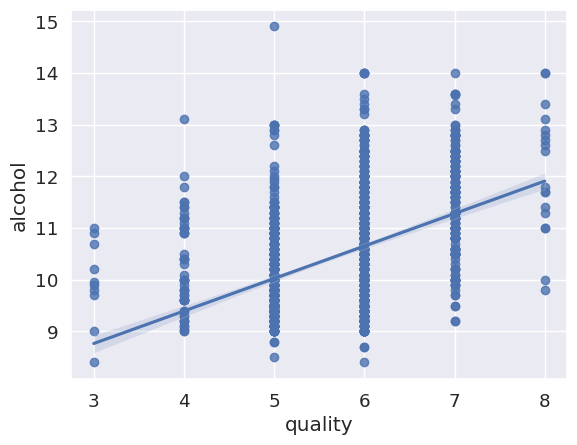

In [ ]:
#Checking data pencilan diantara kolom 'Quality' dan 'Alcohol'
sns.regplot(data = df, x="quality", y="alcohol")

<Axes: xlabel='quality', ylabel='sulphates'>

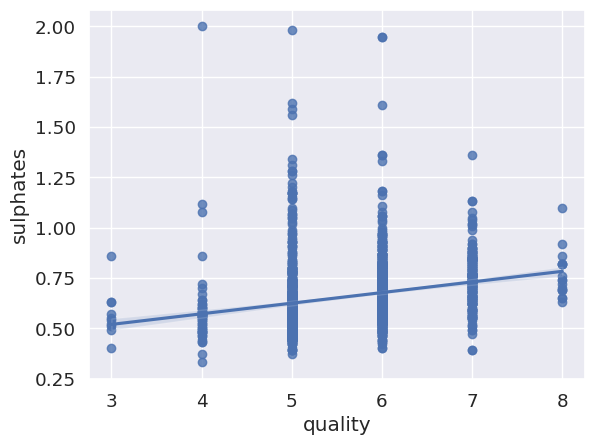

In [ ]:
#Checking data pencilan diantara kolom 'Quality' dan 'Sulphates'
sns.regplot(data = df, x="quality", y="sulphates")

In [ ]:
# fitur 'Sulphates' range < 1.5
df = df[(df["sulphates"] < 1.5)]

<Axes: xlabel='quality', ylabel='sulphates'>

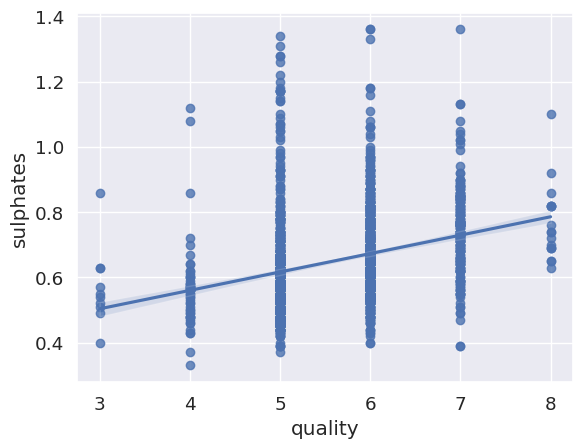

In [ ]:
#Checking data pencilan diantara kolom 'Quality' dan 'Sulphates' dari df baru
sns.regplot(data = df, x="quality", y="sulphates")

In [ ]:
df["quality"].value_counts()

5    677
6    635
7    199
4     52
8     18
3     10
Name: quality, dtype: int64

#Data Preprocessing

In [ ]:
#List Kolom
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [ ]:
#Checking missing value
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#Melabeli fitur 'Quality' diatas 5 menjadi 1(bagus) dan dibawah 5  menjadi 0 (buruk)
df["quality"] = np.where(df["quality"] > 5, 1, 0)

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [ ]:
#Check jumlah 'Quality' berdasarkan label
df['quality'].value_counts()

1    852
0    739
Name: quality, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

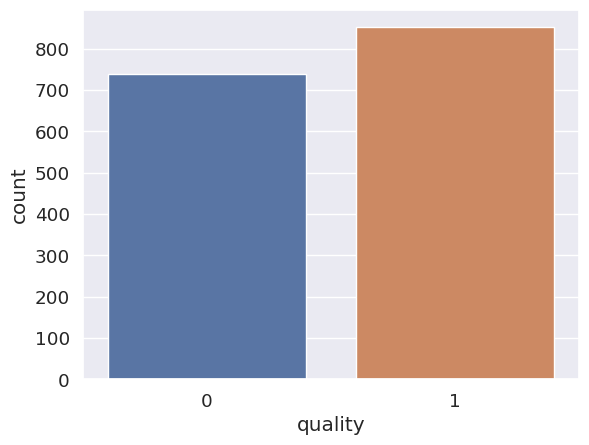

In [ ]:
#Visualisasi
sns.countplot(data=df, x="quality")

In [ ]:
import numpy as np
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

data = {'quality': [1] * 852 + [0] * 739}
df = pd.DataFrame(data)

X = np.array(df.index)
y = np.array(df['quality'])
X = X.reshape(-1, 1)

# Buat objek RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Terapkan oversampling pada data
X_resampled, y_resampled = ros.fit_resample(X, y)

# Tampilkan distribusi kelas setelah oversampling
print(pd.Series(y_resampled).value_counts())


1    852
0    852
dtype: int64


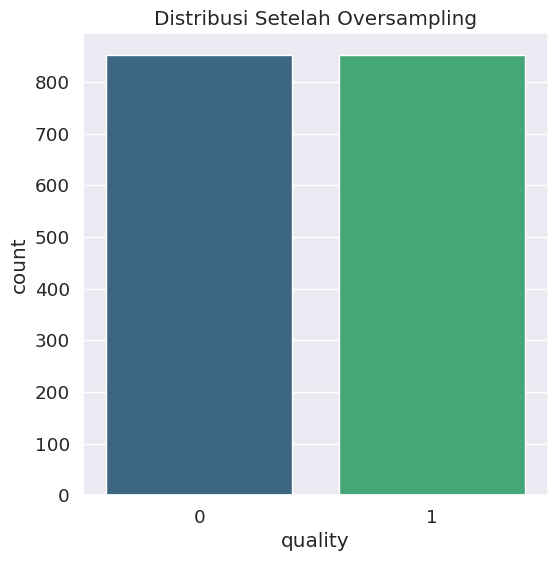

In [ ]:
# Visualisasikan distribusi kelas
plt.figure(figsize=(6, 6))
sns.countplot(x=y_resampled, palette='viridis')
plt.title('Distribusi Setelah Oversampling')
plt.xlabel('quality')
plt.ylabel('count')
plt.show()

#Split Data

In [ ]:
X = df.drop("quality", axis=1)
y = df["quality"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Tampilkan ukuran set pelatihan dan pengujian
print("Train:", len(X_train))
print("Test:", len(X_test))

Train: 1363
Test: 341


# Model Building and Evaluation

## 1. Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, pred_rfc))


[[159   0]
 [  0 182]]


In [ ]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       1.00      1.00      1.00       182

    accuracy                           1.00       341
   macro avg       1.00      1.00      1.00       341
weighted avg       1.00      1.00      1.00       341



In [ ]:
X = df.drop('quality', axis=1)
y = df['quality']

Confusion Matrix:
[[159   0]
 [  0 182]]


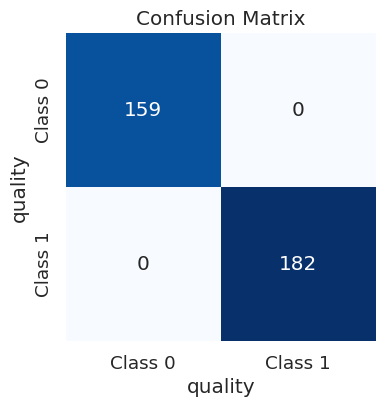

In [ ]:
pred_rfc = rfc.predict(X_test)

# Hitung dan cetak confusion matrix
cm = confusion_matrix(y_test, pred_rfc)
print("Confusion Matrix:")
print(cm)

# Visualisasi confusion matrix menggunakan heatmap
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])

plt.xlabel('quality')
plt.ylabel('quality')
plt.title('Confusion Matrix')
plt.show()
